# Action PixelBytes: Catching Insights in Unified Multimodal Sequences

## Description

**PixelBytes** est un modèle conçu pour générer simultanément du texte, des images, des animations pixel par pixel et des actions-états sous forme de séquences. L'objectif de ce projet est d'explorer un embedding unifié permettant une génération multimodale cohérente, facilitant ainsi l'interaction entre différentes formes de données. [Dépôt GitHub PixelBytes](https://github.com/fabienfrfr/PixelBytes)

## Dataset

Pour ce projet, nous utilisons un dataset créé à partir d'un contrôle optimal LQG (combinant LQR et un filtre de Kalman) sur des systèmes LTI contrôlables, stables et observables.

## Test

Nous testons la génération d'un problème de contrôle à partir d'un environnement Gym personnalisé pour les systèmes LTI. [Dépôt GitHub Gym-Setpoint](https://github.com/fabienfrfr/Gym-Setpoint)

In [1]:
!pip install -q git+https://github.com/fabienfrfr/PixelBytes.git@main
!pip install -q -U git+https://github.com/fabienfrfr/Gym-Setpoint@main

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kaggle-environments 1.14.15 requires gymnasium==0.29.0, but you have gymnasium 1.0.0 which is incompatible.
stable-baselines3 2.1.0 requires gymnasium<0.30,>=0.28.1, but you have gymnasium 1.0.0 which is incompatible.


In [2]:
import gymnasium as gym
import gym_setpoint
# custom import
from gym_setpoint.envs import gym_wrap, lti_env, multi_lti
from pixelbytes import *
from datasets import load_dataset
import pylab as plt
from tqdm import tqdm

In [3]:
dataset = load_dataset("ffurfaro/PixelBytes-OptimalControl")['train']
dataset

README.md:   0%|          | 0.00/372 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/12.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9370 [00:00<?, ? examples/s]

Dataset({
    features: ['audio', 'text'],
    num_rows: 9370
})

In [4]:
DATA_REDUCTION = {"image":1, "audio":1} # important pour la proportion des data en AR (overfitting audio risk)
#tokenizer = ActionPixelBytesTokenizer(data_slicing=DATA_REDUCTION)
MIN_BYTES = [b'\x00', b'\t', b'\n', b'0', b'1']
MIN_PALETTE = generate_palette(num_colors=5)
ACTION_STATE= generate_action_space(141)
tokenizer = ActionPixelBytesTokenizer(BYTES=MIN_BYTES, PALETTE=MIN_PALETTE, ACTION_STATE=ACTION_STATE, data_slicing=DATA_REDUCTION)

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


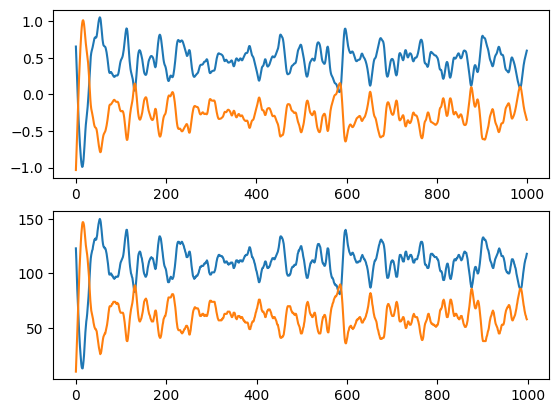

In [5]:
row = np.random.randint(dataset.num_rows)
timestamp = dataset[row]['audio']
# comparizons
tokenstamp = tokenizer(audio=timestamp)
fig, ax = plt.subplots(2)
ax[0].plot(timestamp['array'].T)
ax[1].plot(tokenstamp["labels"].detach().reshape(-1,2)[:-2]); plt.show()

In [6]:
model = aPxBySequenceModel.from_pretrained("ffurfaro/aPixelBytes-OptimalControl", subfolder="bilstm_diffusion_last")
model.config

bilstm_diffusion_last/config.json:   0%|          | 0.00/339 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.58M [00:00<?, ?B/s]

(…)tm_diffusion_last/generation_config.json:   0%|          | 0.00/69.0 [00:00<?, ?B/s]

ModelConfig {
  "_name_or_path": "ffurfaro/aPixelBytes-OptimalControl",
  "architectures": [
    "aPxBySequenceModel"
  ],
  "bidirection": true,
  "custom_model": null,
  "embed_size": 126,
  "hidden_size": 128,
  "num_diffusion_steps": 5,
  "num_layers": 2,
  "objective": "diffusion",
  "pxby_dim": 6,
  "pxby_emb": 21,
  "torch_dtype": "float32",
  "transformers_version": "4.44.2",
  "vocab_size": 151
}

In [7]:
# Create and use LTI-Env
env = lti_env.LtiEnv(custom_config={"env_mode":0, "reset_X_start":False, "tf":[([1],[1,1])],
                                    "setpoint": 0.5,  "t":20,"N":1000+2})
print(env.ss, env.config['tf'], env.setpoint, env.sign)
env.config

i           1
s           1
A    [[-1.0]]
B     [[1.0]]
C     [[1.0]]
D     [[0.0]]
dtype: object [([1], [1, 1])] 0.5 1.0


{'env_mode': 0,
 'update_setpoint': True,
 'reset_X_start': False,
 'tf': [([1], [1, 1])],
 'reset': True,
 'isdiscrete': False,
 'SpaceState': None,
 'setpoint': 0.5,
 'env_config': None,
 'modular': False,
 'return_action': True,
 'return_speed': False,
 'order': 3,
 't': 20,
 'N': 1002}

Running simulations:   0%|          | 0/100 [00:00<?, ?it/s]

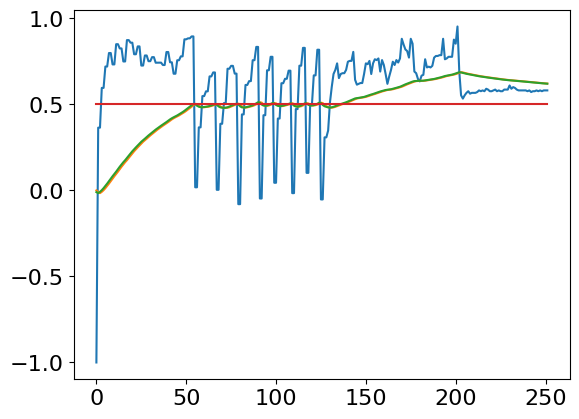

Running simulations:   1%|          | 1/100 [00:22<37:37, 22.80s/it]

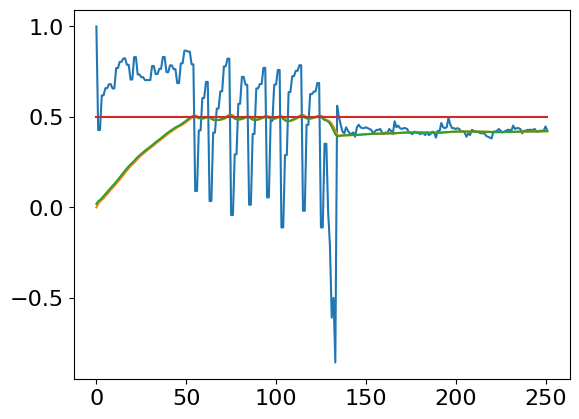

Running simulations:   2%|▏         | 2/100 [00:45<37:10, 22.76s/it]

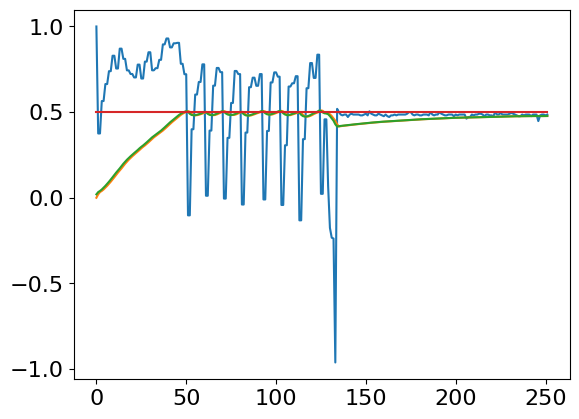

Running simulations:   3%|▎         | 3/100 [01:08<36:50, 22.79s/it]

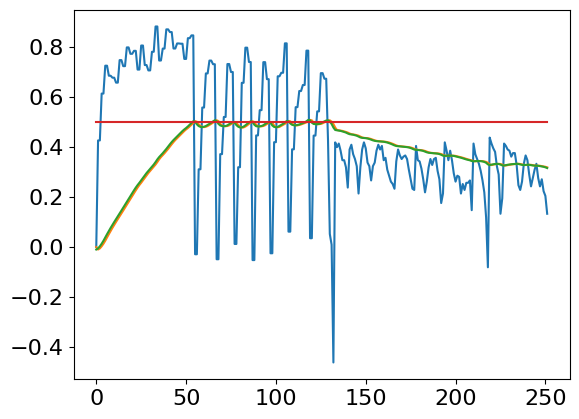

Running simulations:   4%|▍         | 4/100 [01:31<36:25, 22.77s/it]

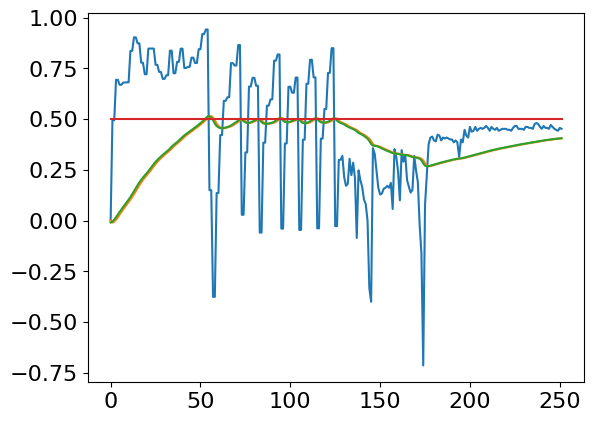

Running simulations:   5%|▌         | 5/100 [01:53<36:01, 22.75s/it]

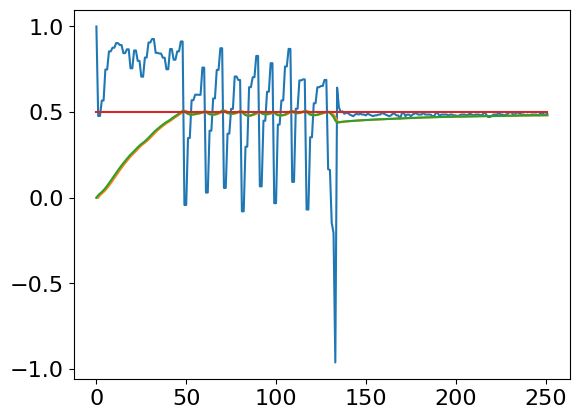

Running simulations:   6%|▌         | 6/100 [02:16<35:42, 22.79s/it]

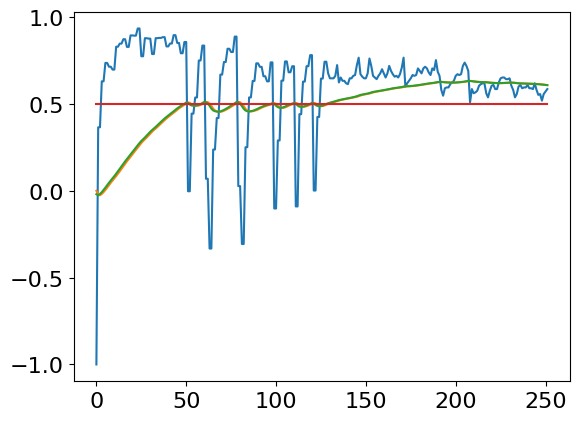

Running simulations:   7%|▋         | 7/100 [02:40<35:40, 23.02s/it]

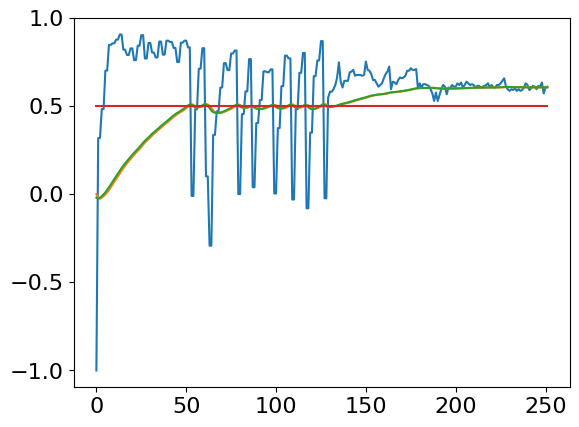

Running simulations:   8%|▊         | 8/100 [03:03<35:14, 22.99s/it]

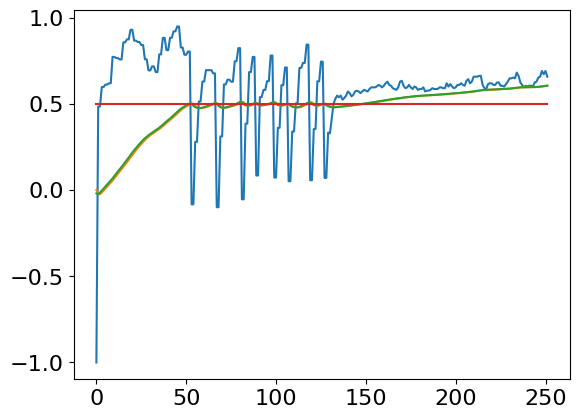

Running simulations:   9%|▉         | 9/100 [03:26<35:00, 23.08s/it]

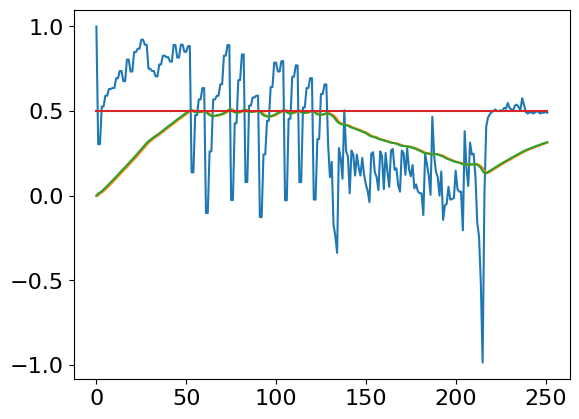

Running simulations:  10%|█         | 10/100 [03:49<34:38, 23.10s/it]

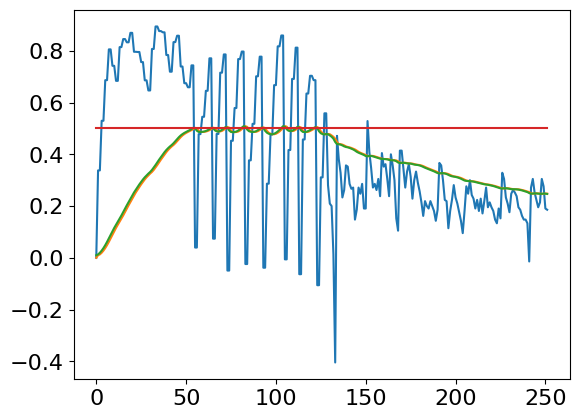

Running simulations:  11%|█         | 11/100 [04:12<34:07, 23.00s/it]

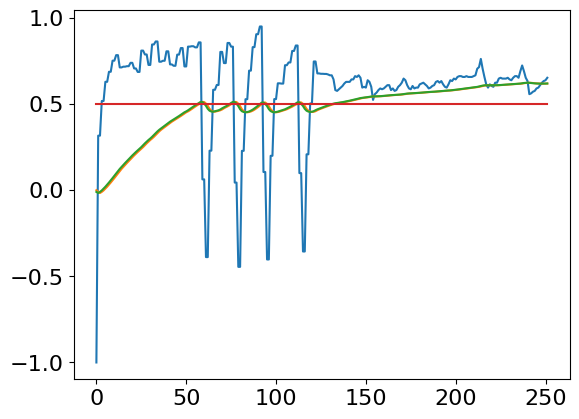

Running simulations:  12%|█▏        | 12/100 [04:35<33:58, 23.16s/it]

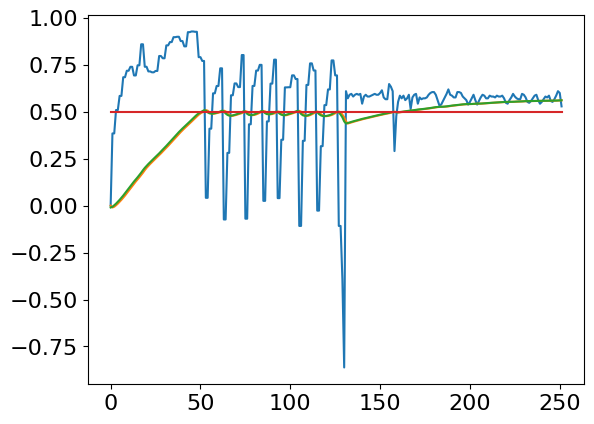

Running simulations:  13%|█▎        | 13/100 [04:59<33:41, 23.24s/it]

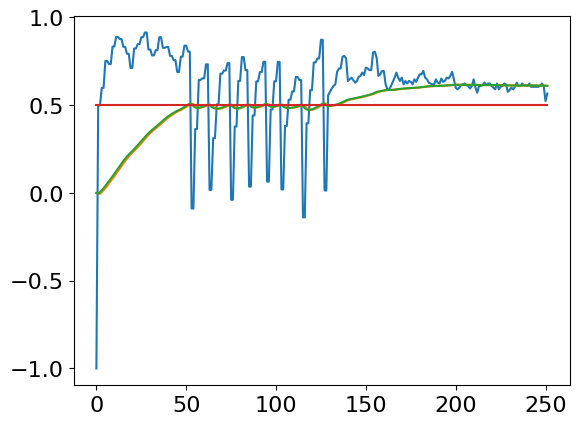

Running simulations:  14%|█▍        | 14/100 [05:22<33:14, 23.19s/it]

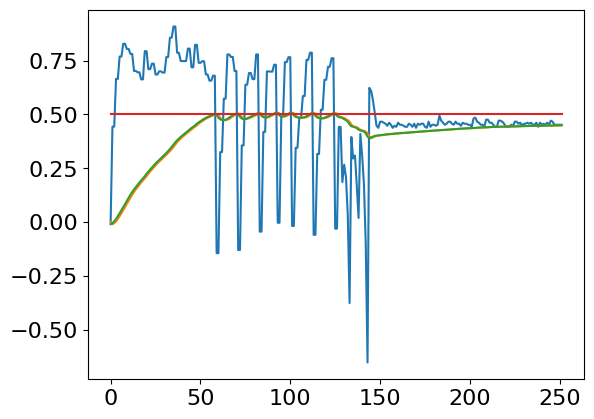

Running simulations:  15%|█▌        | 15/100 [05:45<32:47, 23.14s/it]

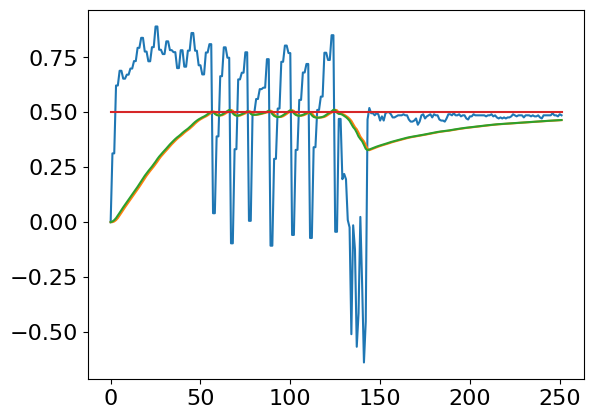

Running simulations:  16%|█▌        | 16/100 [06:08<32:28, 23.19s/it]

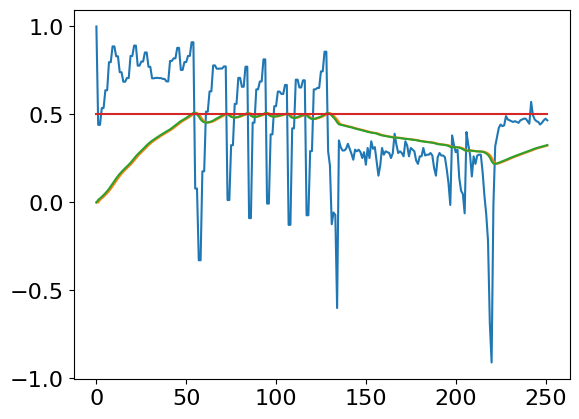

Running simulations:  17%|█▋        | 17/100 [06:32<32:09, 23.25s/it]

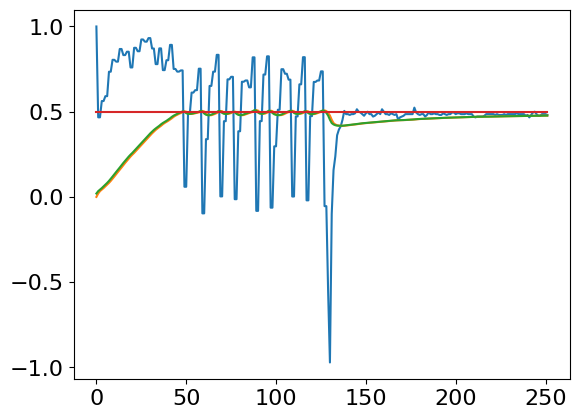

Running simulations:  18%|█▊        | 18/100 [06:54<31:34, 23.10s/it]

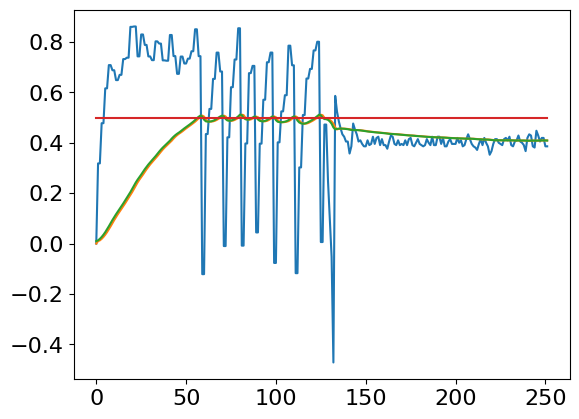

Running simulations:  19%|█▉        | 19/100 [07:17<31:11, 23.10s/it]

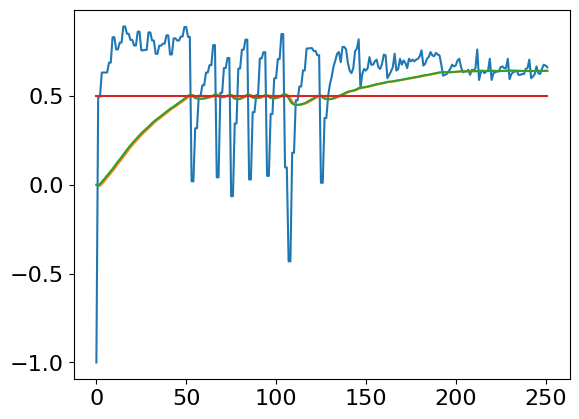

Running simulations:  20%|██        | 20/100 [07:41<30:51, 23.14s/it]

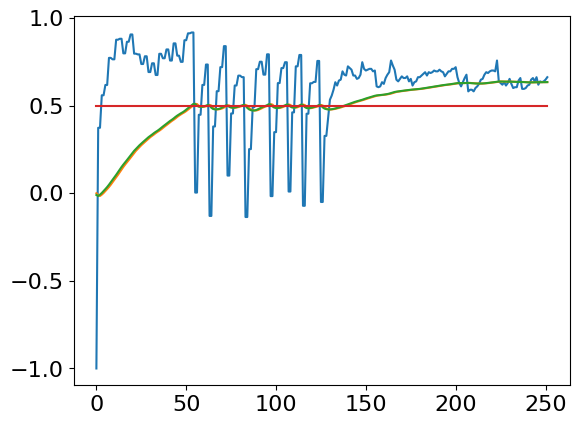

Running simulations:  21%|██        | 21/100 [08:03<30:19, 23.04s/it]

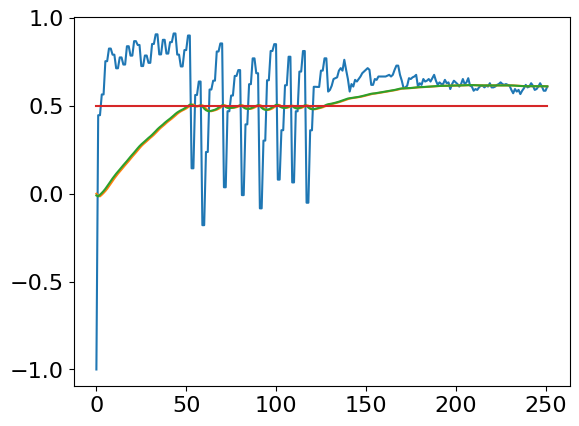

Running simulations:  22%|██▏       | 22/100 [08:27<30:03, 23.13s/it]

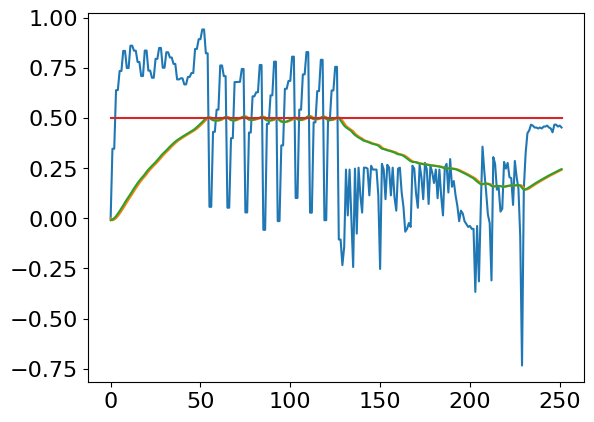

Running simulations:  23%|██▎       | 23/100 [08:50<29:45, 23.19s/it]

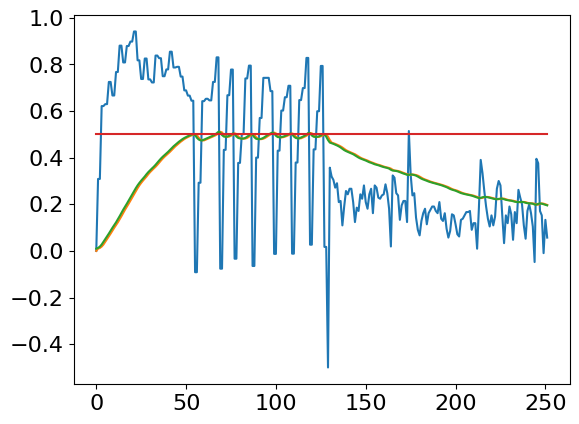

Running simulations:  24%|██▍       | 24/100 [09:13<29:27, 23.25s/it]

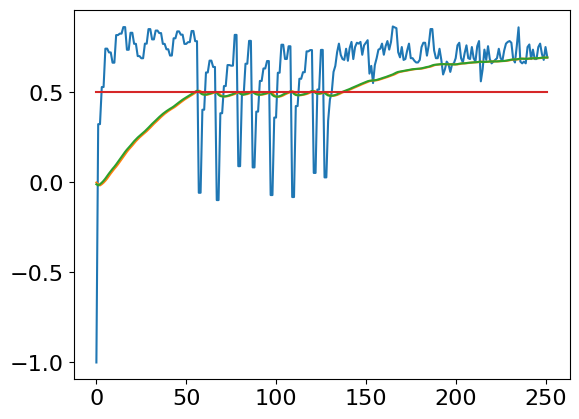

Running simulations:  25%|██▌       | 25/100 [09:36<28:52, 23.10s/it]

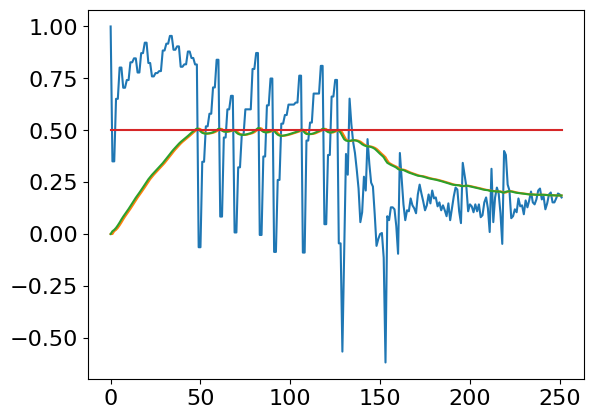

Running simulations:  26%|██▌       | 26/100 [09:59<28:32, 23.14s/it]

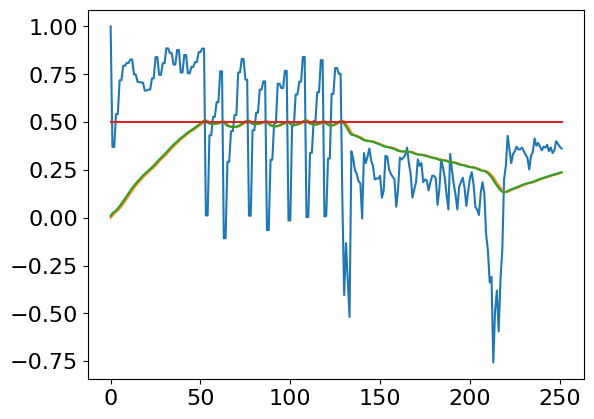

Running simulations:  27%|██▋       | 27/100 [10:22<28:05, 23.09s/it]

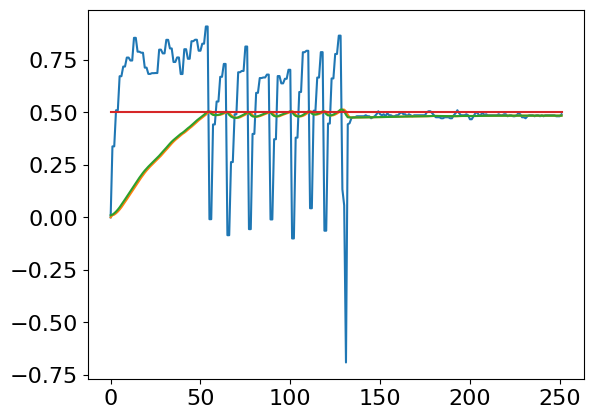

Running simulations:  28%|██▊       | 28/100 [10:45<27:36, 23.01s/it]

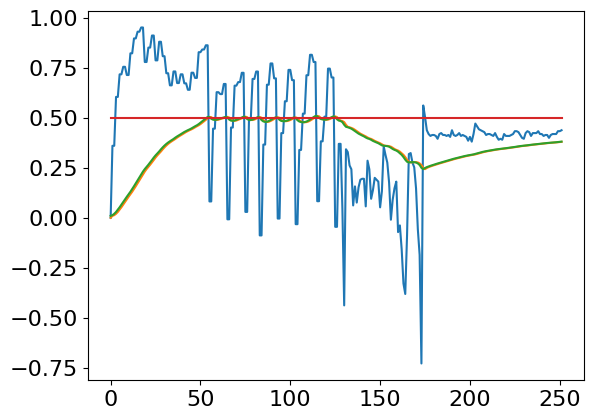

Running simulations:  29%|██▉       | 29/100 [11:09<27:21, 23.12s/it]

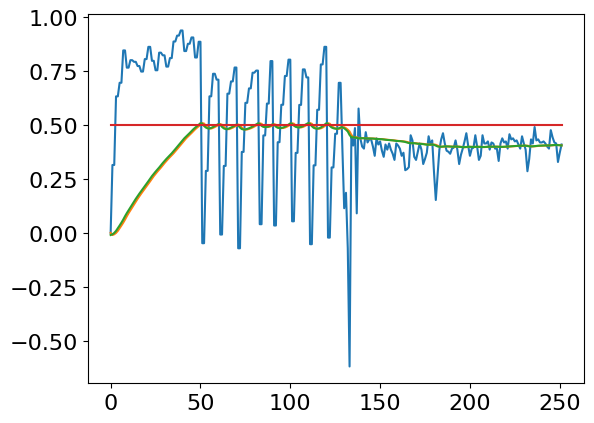

Running simulations:  30%|███       | 30/100 [11:32<27:00, 23.15s/it]

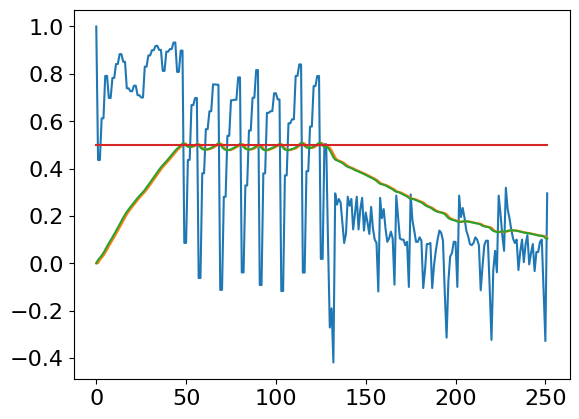

Running simulations:  31%|███       | 31/100 [11:55<26:40, 23.20s/it]

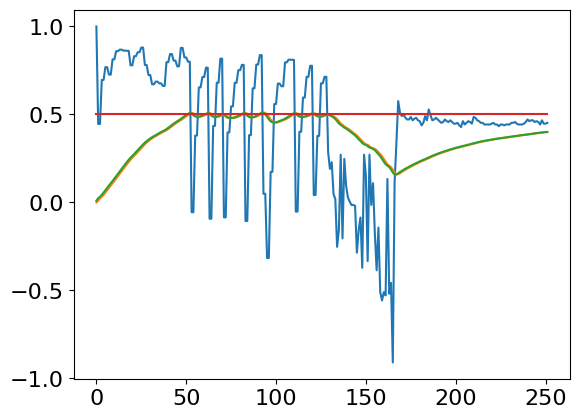

Running simulations:  32%|███▏      | 32/100 [12:18<26:04, 23.01s/it]

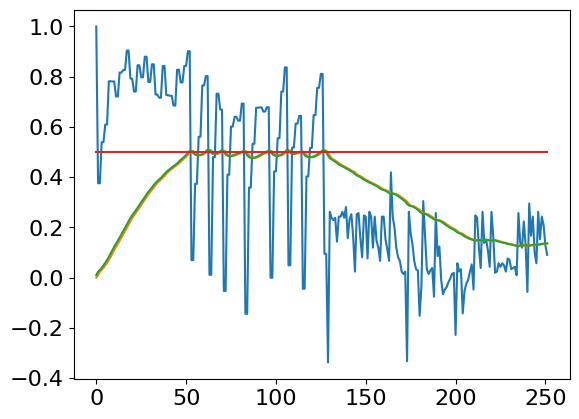

Running simulations:  33%|███▎      | 33/100 [12:41<25:48, 23.11s/it]

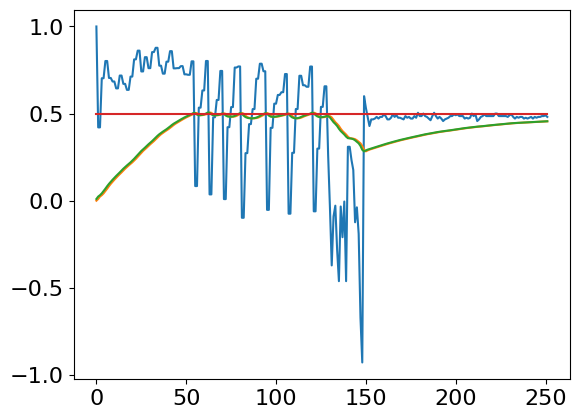

Running simulations:  34%|███▍      | 34/100 [13:04<25:28, 23.16s/it]

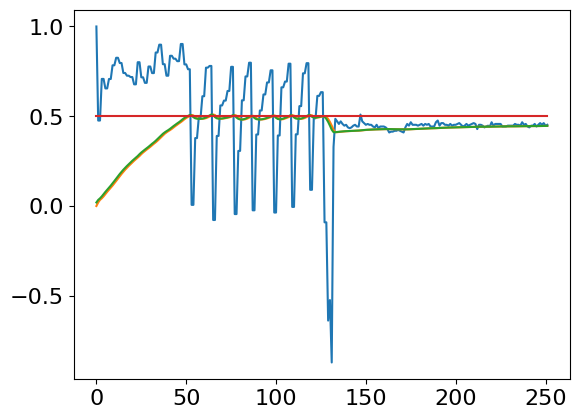

Running simulations:  35%|███▌      | 35/100 [13:27<24:56, 23.03s/it]

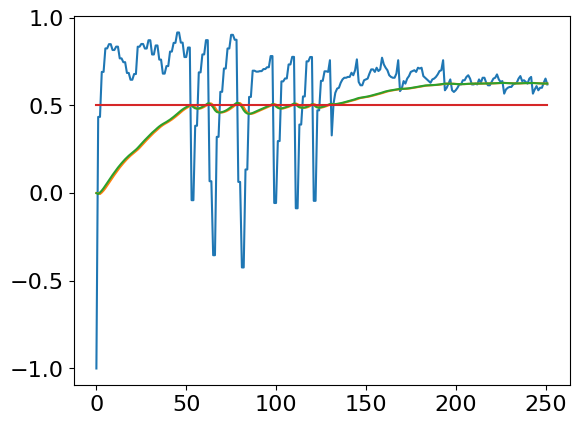

Running simulations:  36%|███▌      | 36/100 [13:50<24:37, 23.09s/it]

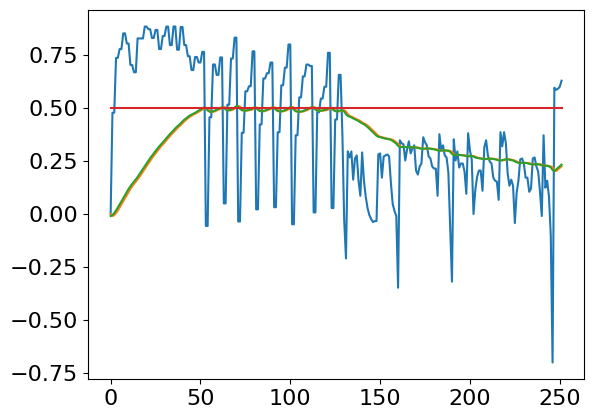

Running simulations:  37%|███▋      | 37/100 [14:14<24:17, 23.13s/it]

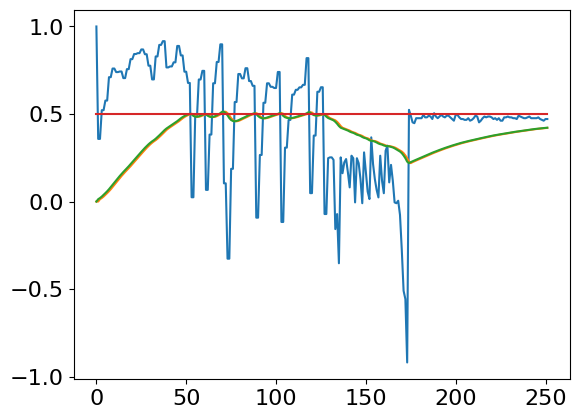

Running simulations:  38%|███▊      | 38/100 [14:37<24:06, 23.34s/it]

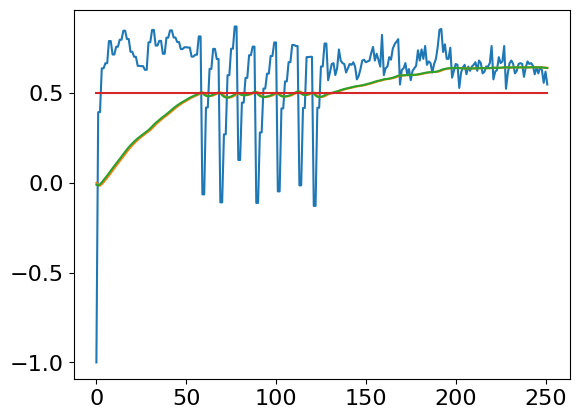

Running simulations:  39%|███▉      | 39/100 [15:00<23:30, 23.13s/it]

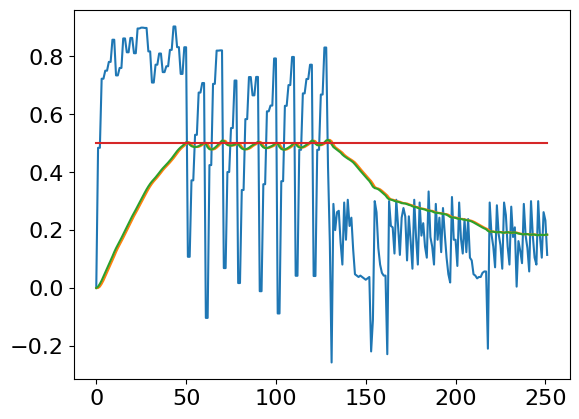

Running simulations:  40%|████      | 40/100 [15:23<23:10, 23.18s/it]

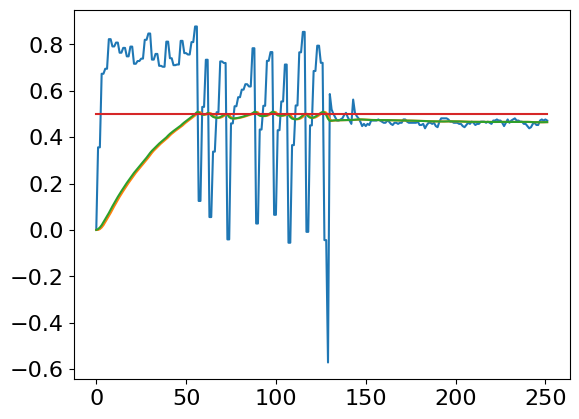

Running simulations:  41%|████      | 41/100 [15:47<22:50, 23.22s/it]

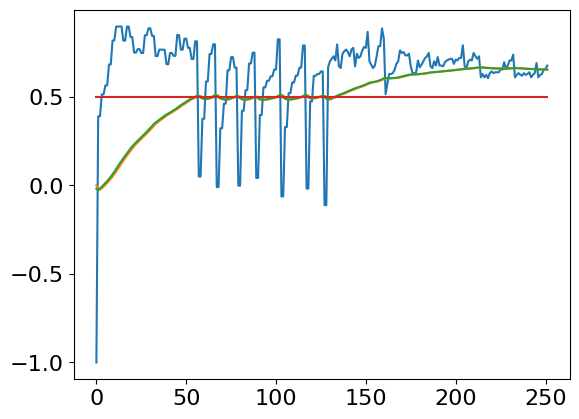

Running simulations:  42%|████▏     | 42/100 [16:09<22:17, 23.07s/it]

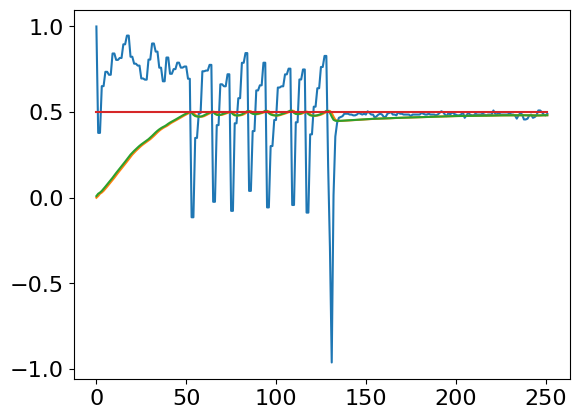

Running simulations:  43%|████▎     | 43/100 [16:33<21:59, 23.16s/it]

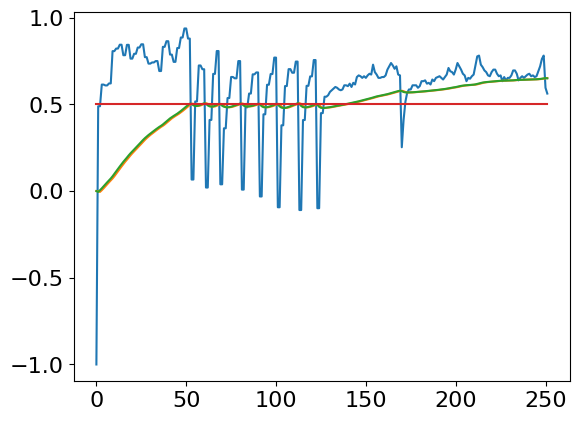

Running simulations:  44%|████▍     | 44/100 [16:56<21:39, 23.20s/it]

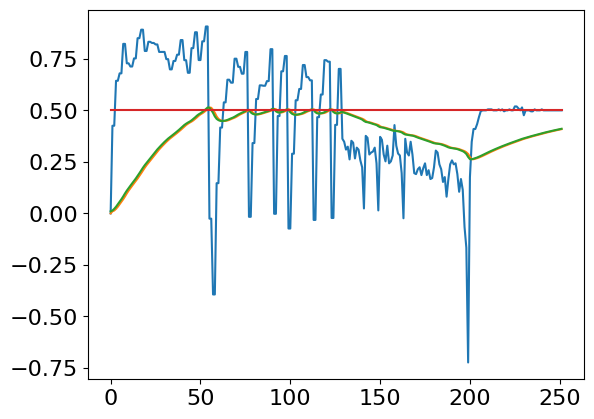

Running simulations:  45%|████▌     | 45/100 [17:19<21:12, 23.13s/it]

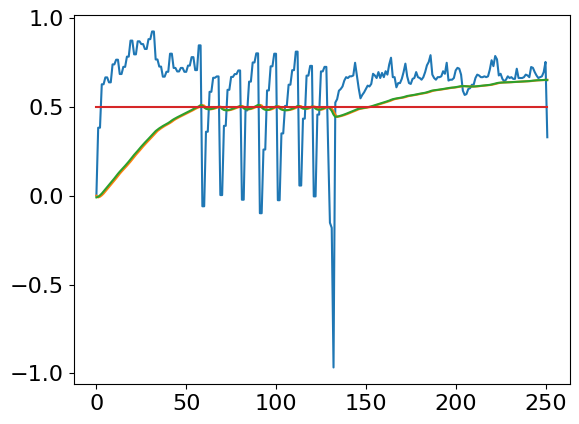

Running simulations:  46%|████▌     | 46/100 [17:42<20:46, 23.09s/it]

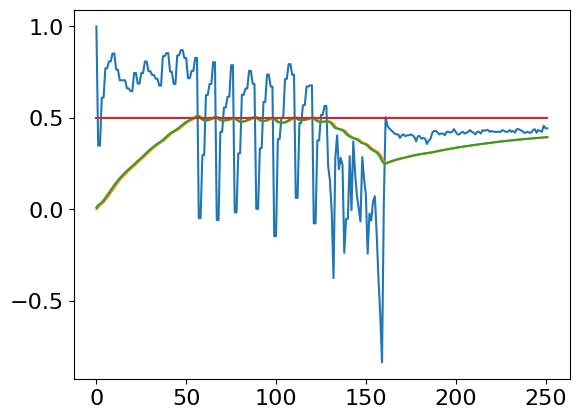

Running simulations:  47%|████▋     | 47/100 [18:05<20:24, 23.10s/it]

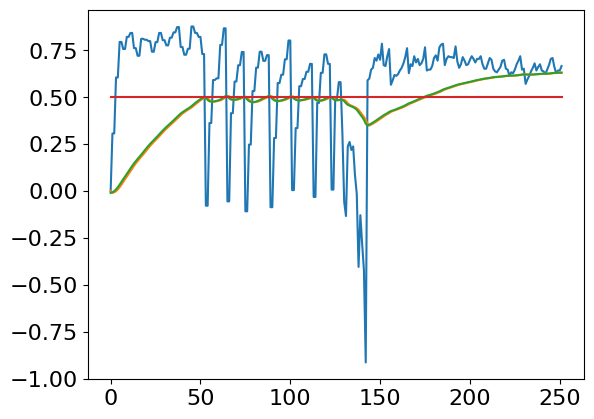

Running simulations:  48%|████▊     | 48/100 [18:28<20:02, 23.13s/it]

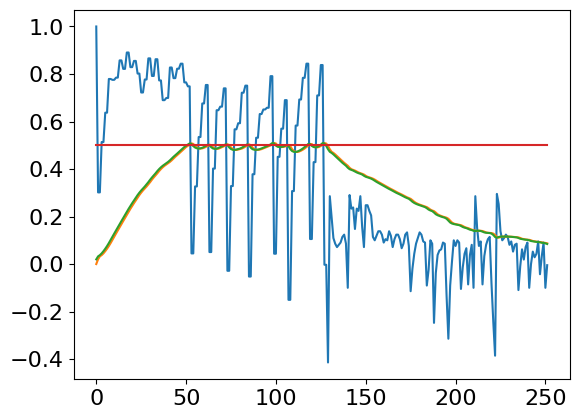

Running simulations:  49%|████▉     | 49/100 [18:51<19:32, 22.99s/it]

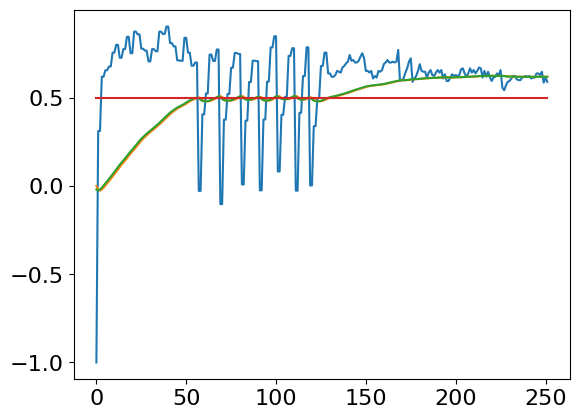

Running simulations:  50%|█████     | 50/100 [19:14<19:10, 23.02s/it]

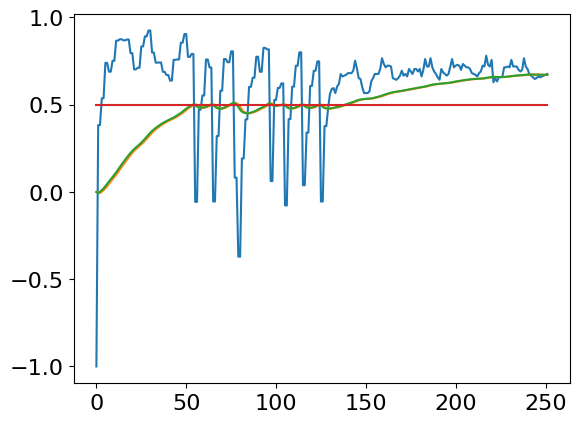

Running simulations:  51%|█████     | 51/100 [19:37<18:50, 23.07s/it]

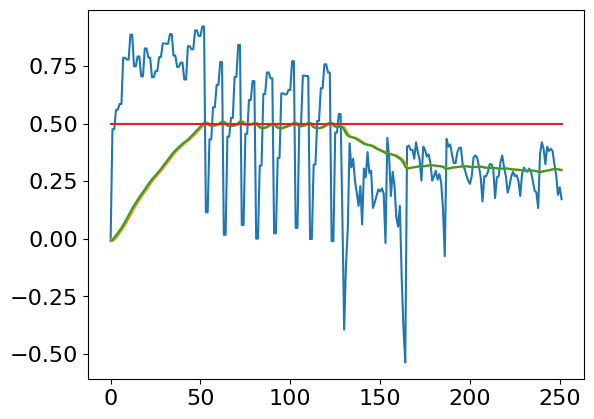

Running simulations:  52%|█████▏    | 52/100 [20:00<18:22, 22.97s/it]

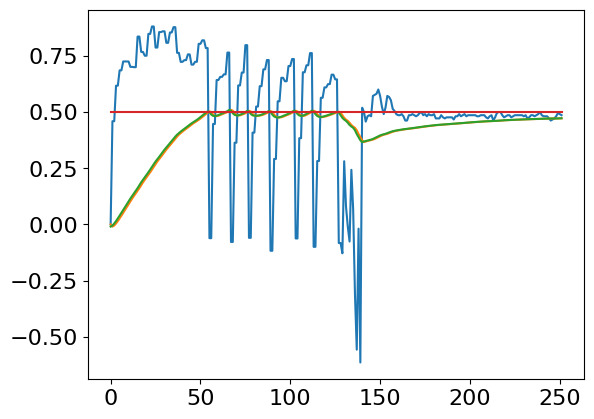

Running simulations:  53%|█████▎    | 53/100 [20:23<18:02, 23.04s/it]

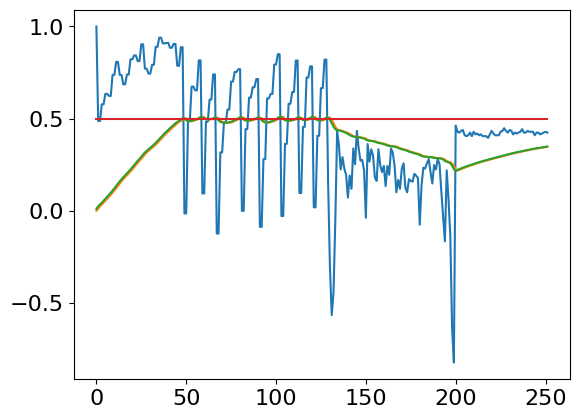

Running simulations:  54%|█████▍    | 54/100 [20:47<17:44, 23.14s/it]

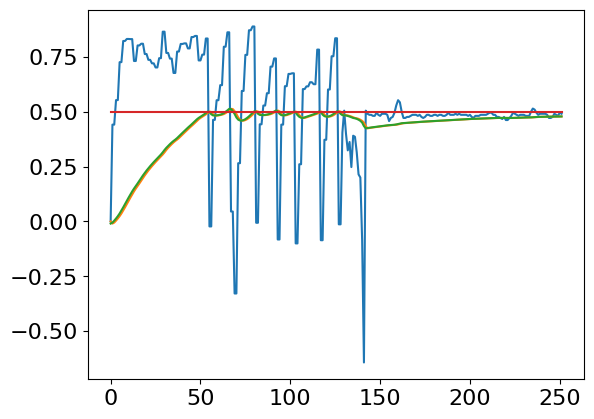

Running simulations:  55%|█████▌    | 55/100 [21:10<17:21, 23.14s/it]

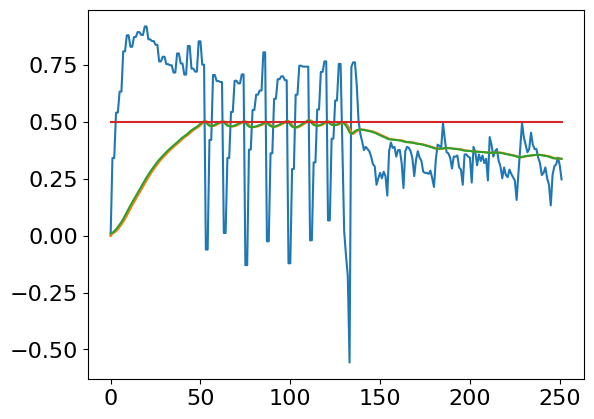

Running simulations:  56%|█████▌    | 56/100 [21:32<16:51, 22.98s/it]

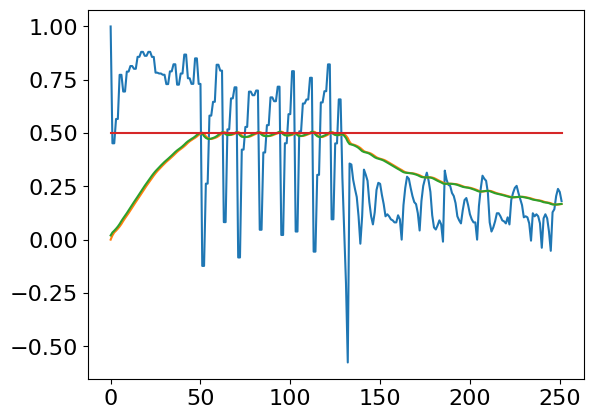

Running simulations:  57%|█████▋    | 57/100 [21:56<16:32, 23.08s/it]

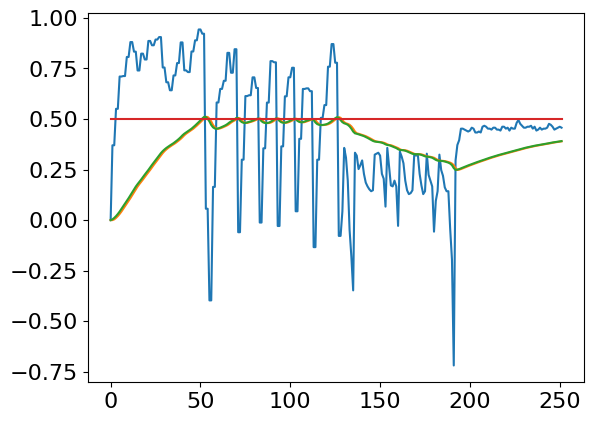

Running simulations:  58%|█████▊    | 58/100 [22:19<16:12, 23.16s/it]

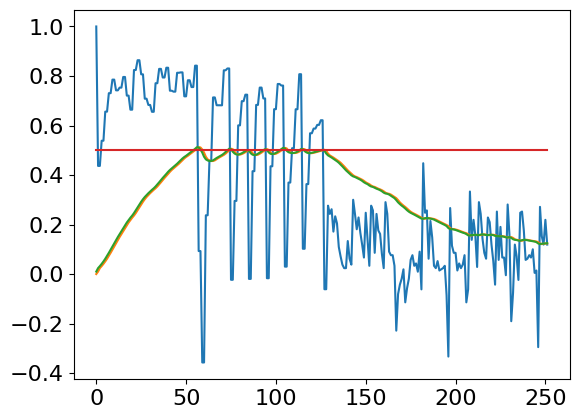

Running simulations:  59%|█████▉    | 59/100 [22:41<15:40, 22.94s/it]

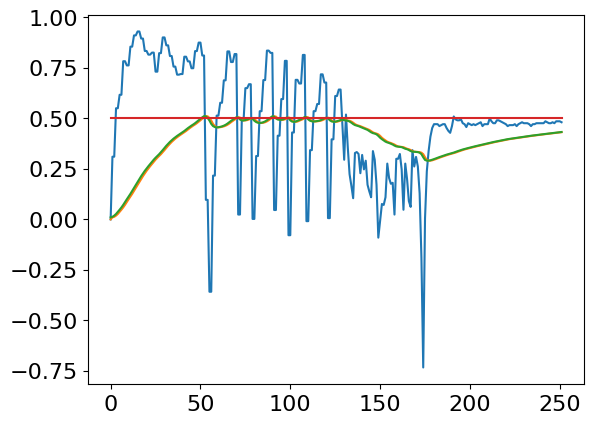

Running simulations:  60%|██████    | 60/100 [23:05<15:20, 23.01s/it]

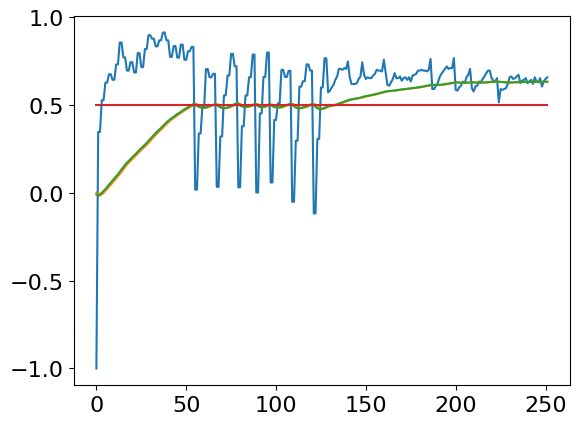

Running simulations:  61%|██████    | 61/100 [23:27<14:55, 22.97s/it]

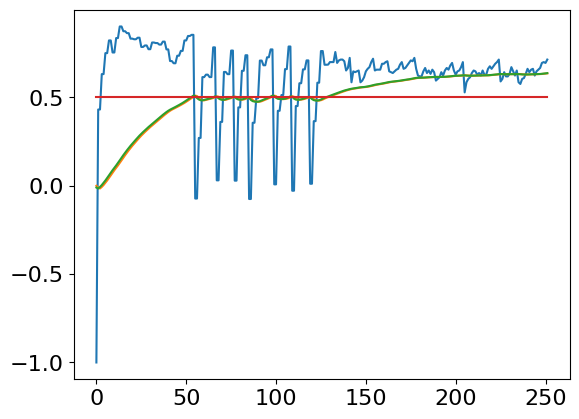

Running simulations:  62%|██████▏   | 62/100 [23:50<14:27, 22.82s/it]

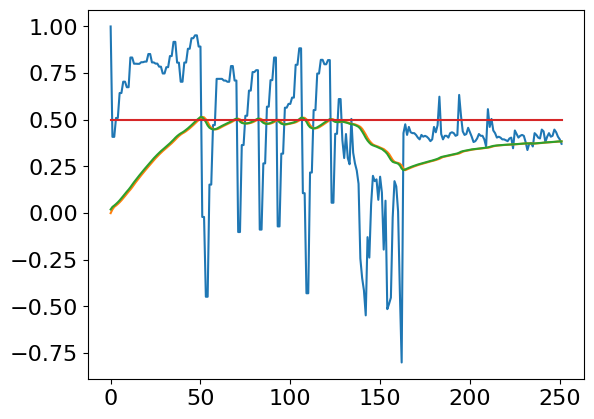

Running simulations:  63%|██████▎   | 63/100 [24:13<14:11, 23.00s/it]

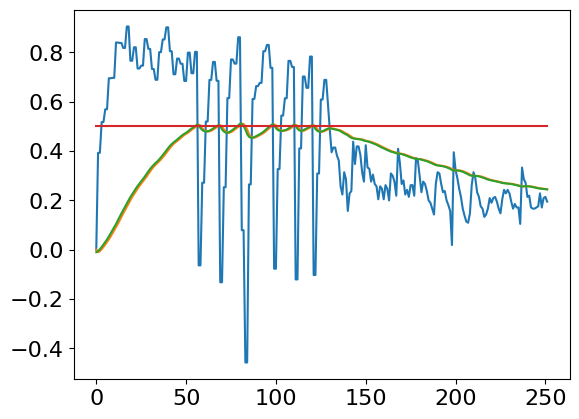

Running simulations:  64%|██████▍   | 64/100 [24:37<13:54, 23.19s/it]

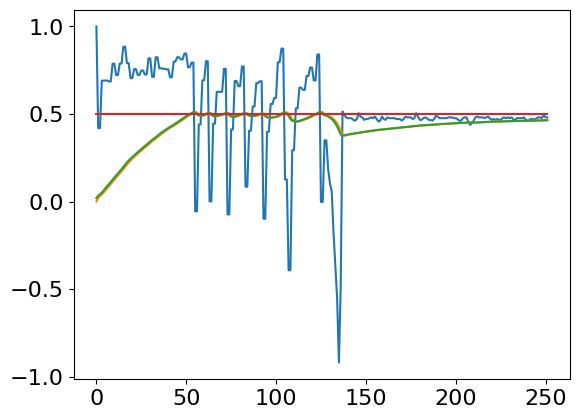

Running simulations:  65%|██████▌   | 65/100 [25:01<13:35, 23.31s/it]

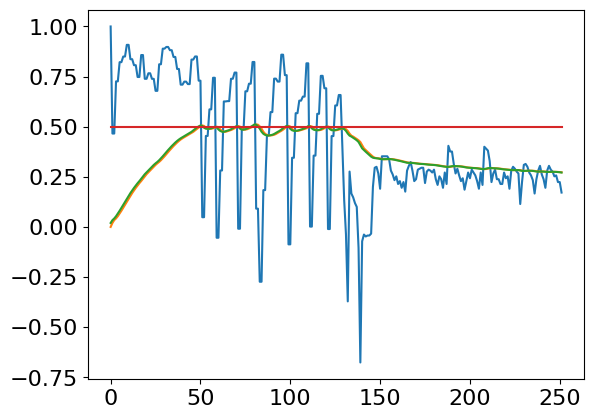

Running simulations:  66%|██████▌   | 66/100 [25:24<13:10, 23.25s/it]

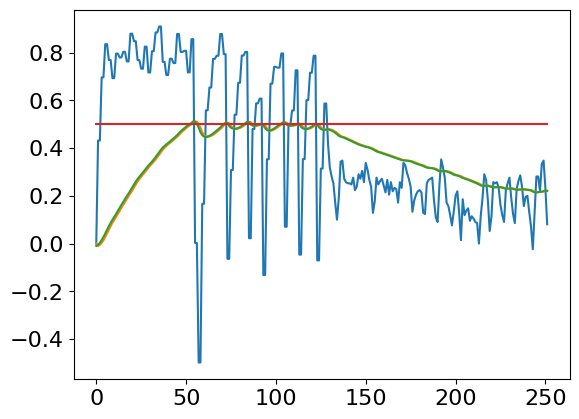

Running simulations:  67%|██████▋   | 67/100 [25:47<12:52, 23.40s/it]

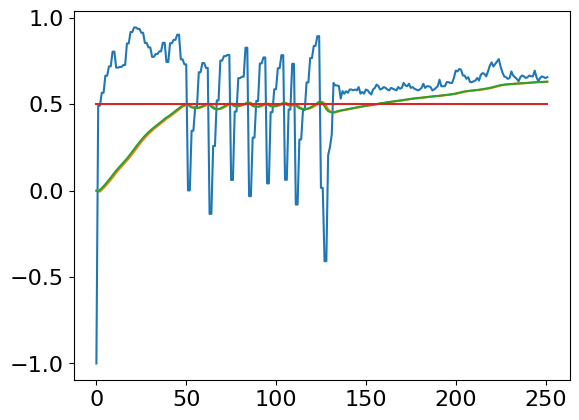

Running simulations:  68%|██████▊   | 68/100 [26:11<12:32, 23.52s/it]

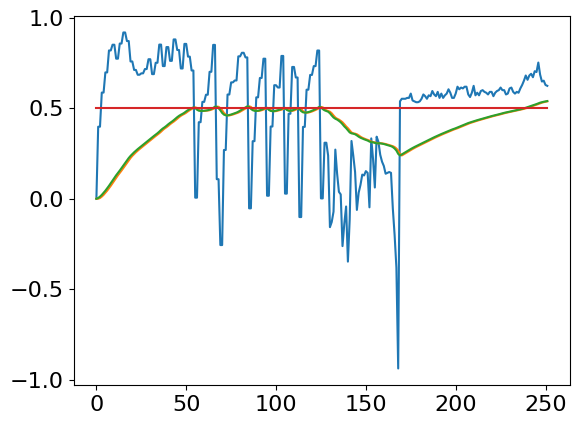

Running simulations:  69%|██████▉   | 69/100 [26:34<12:04, 23.39s/it]

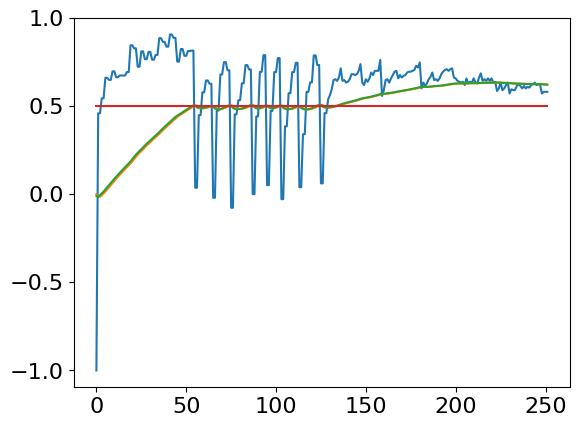

Running simulations:  70%|███████   | 70/100 [26:58<11:42, 23.42s/it]

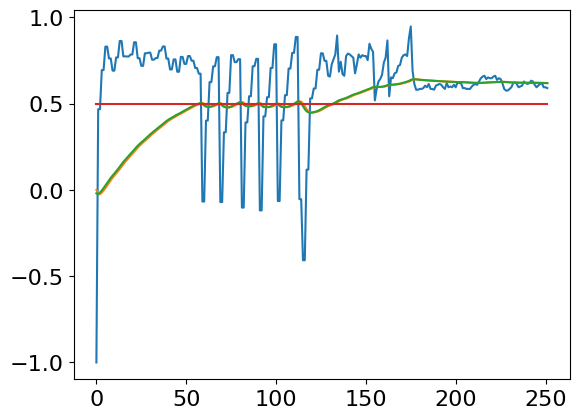

Running simulations:  71%|███████   | 71/100 [27:21<11:21, 23.48s/it]

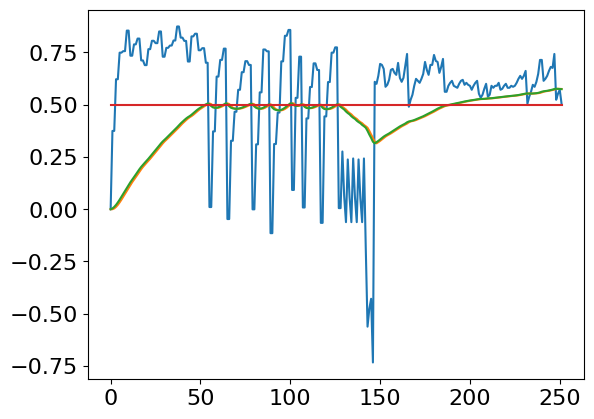

Running simulations:  72%|███████▏  | 72/100 [27:45<10:59, 23.57s/it]

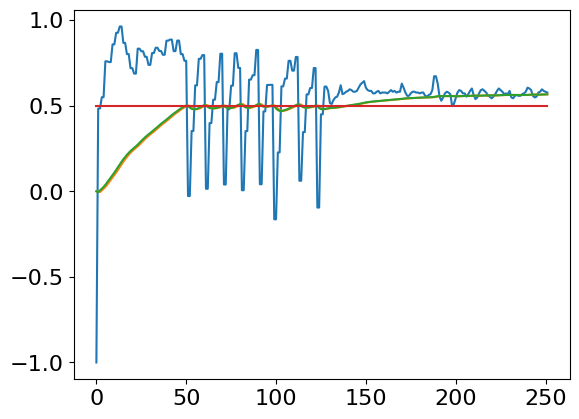

Running simulations:  73%|███████▎  | 73/100 [28:08<10:32, 23.42s/it]

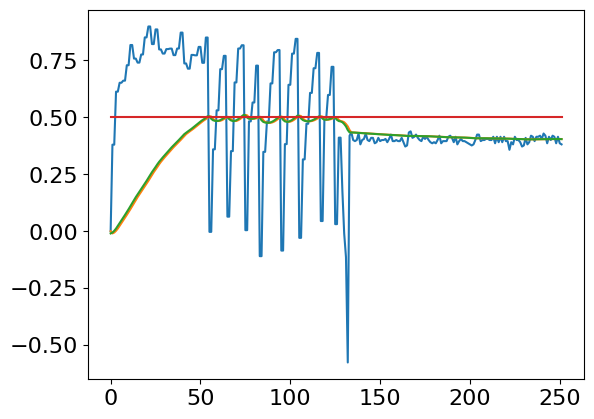

Running simulations:  74%|███████▍  | 74/100 [28:32<10:08, 23.42s/it]

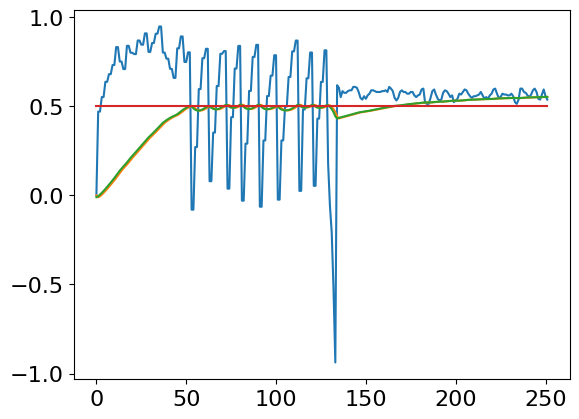

Running simulations:  75%|███████▌  | 75/100 [28:55<09:46, 23.46s/it]

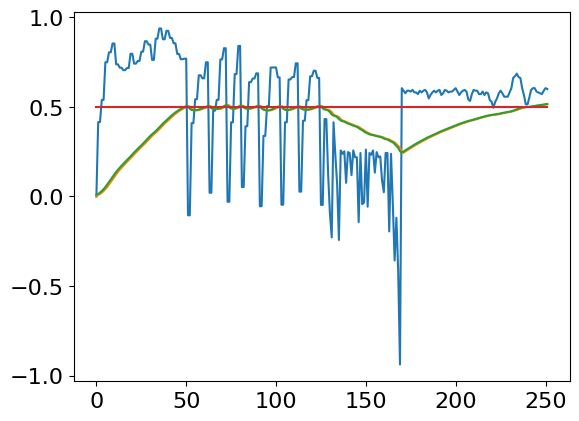

Running simulations:  76%|███████▌  | 76/100 [29:19<09:22, 23.43s/it]

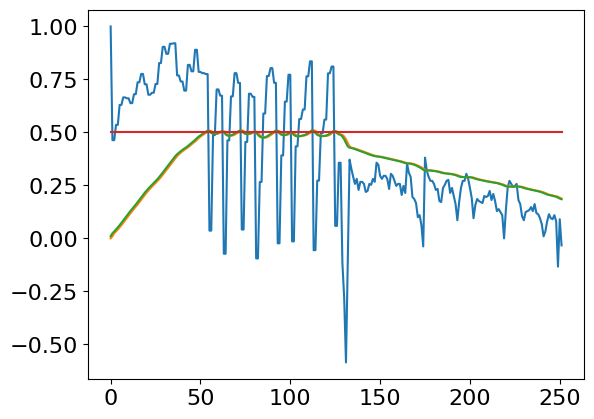

Running simulations:  77%|███████▋  | 77/100 [29:41<08:54, 23.23s/it]

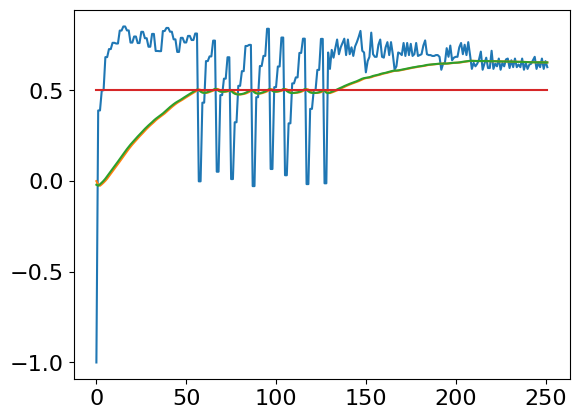

Running simulations:  78%|███████▊  | 78/100 [30:05<08:31, 23.26s/it]

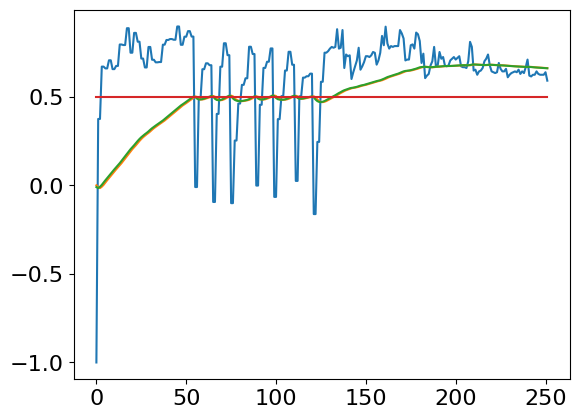

Running simulations:  79%|███████▉  | 79/100 [30:28<08:09, 23.30s/it]

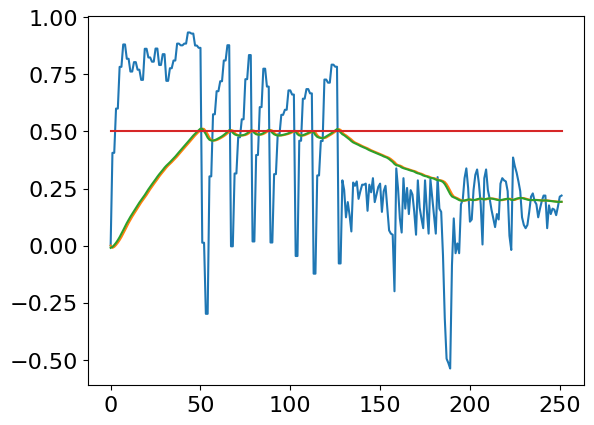

Running simulations:  80%|████████  | 80/100 [30:51<07:43, 23.18s/it]

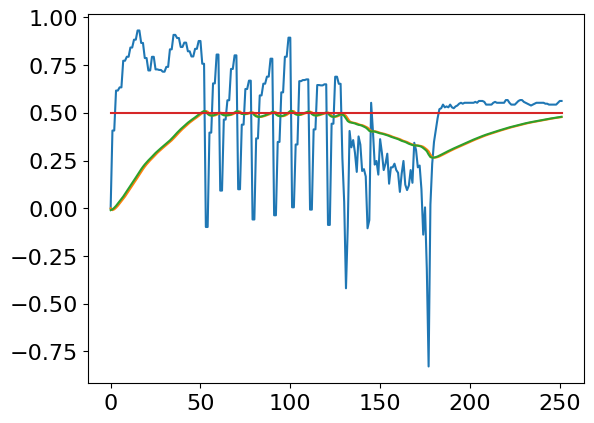

Running simulations:  81%|████████  | 81/100 [31:14<07:22, 23.28s/it]

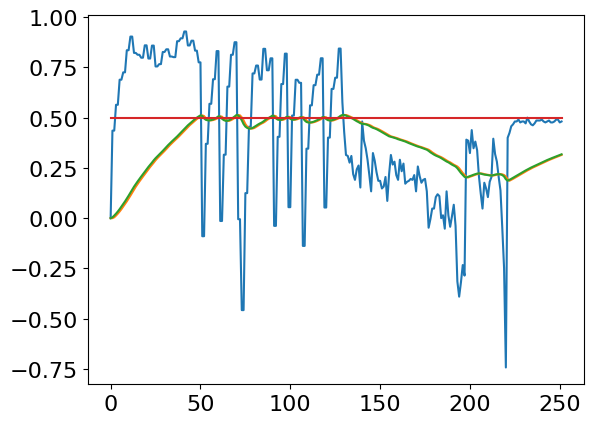

Running simulations:  82%|████████▏ | 82/100 [31:38<06:59, 23.28s/it]

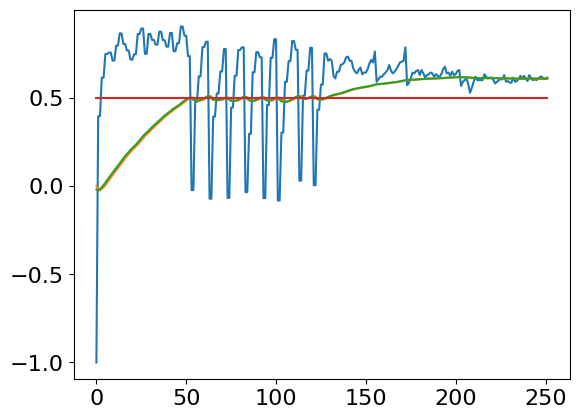

Running simulations:  83%|████████▎ | 83/100 [32:01<06:34, 23.19s/it]

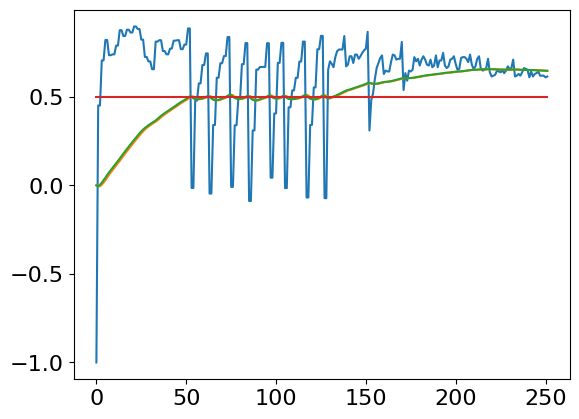

Running simulations:  84%|████████▍ | 84/100 [32:24<06:10, 23.16s/it]

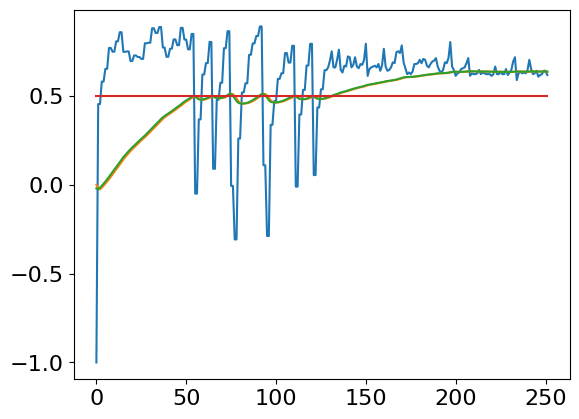

Running simulations:  85%|████████▌ | 85/100 [32:47<05:47, 23.18s/it]

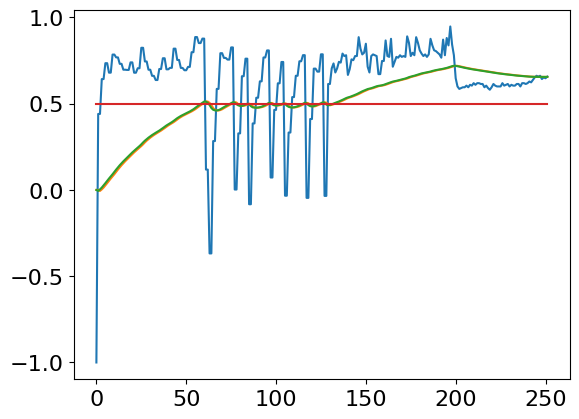

Running simulations:  86%|████████▌ | 86/100 [33:10<05:23, 23.13s/it]

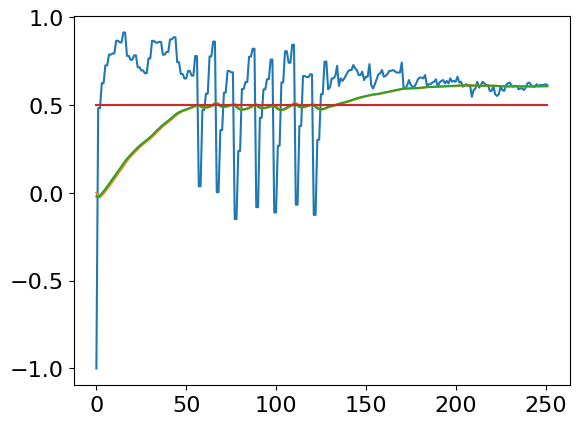

Running simulations:  87%|████████▋ | 87/100 [33:33<04:58, 22.97s/it]

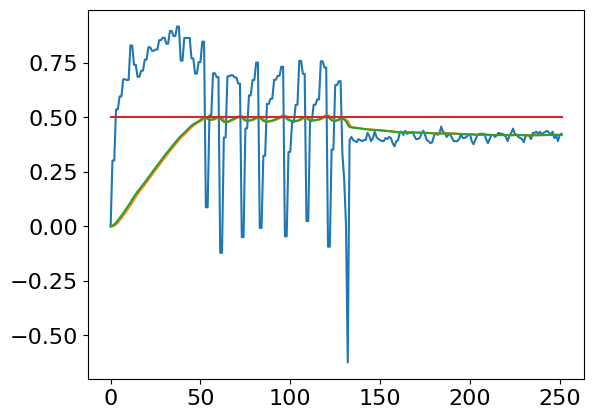

Running simulations:  88%|████████▊ | 88/100 [33:56<04:36, 23.02s/it]

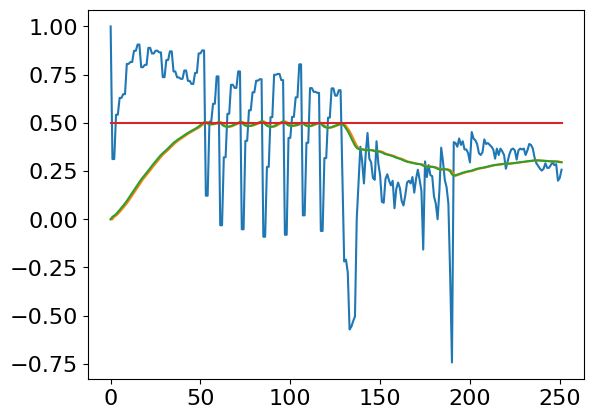

Running simulations:  89%|████████▉ | 89/100 [34:19<04:12, 22.99s/it]

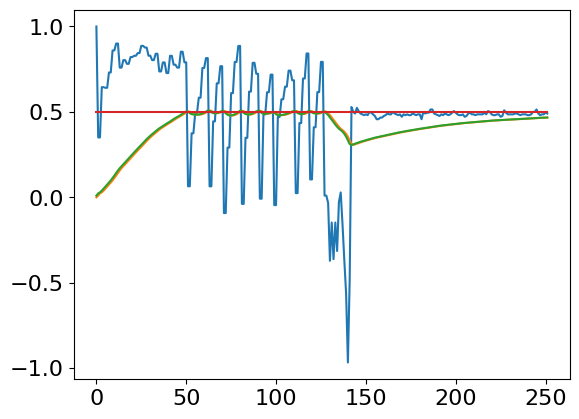

Running simulations:  90%|█████████ | 90/100 [34:41<03:48, 22.83s/it]

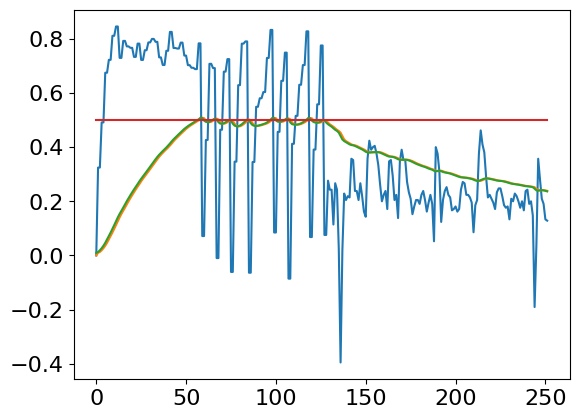

Running simulations:  91%|█████████ | 91/100 [35:04<03:26, 22.93s/it]

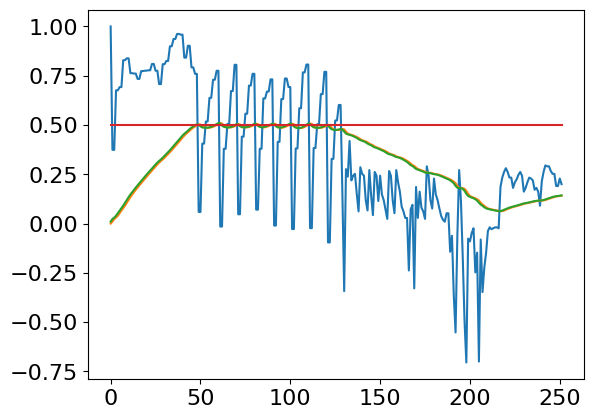

Running simulations:  92%|█████████▏| 92/100 [35:27<03:03, 22.98s/it]

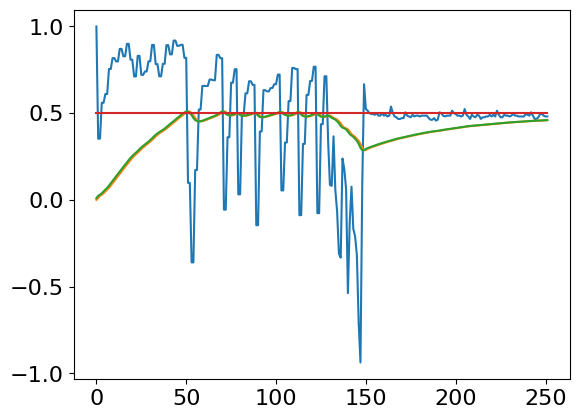

Running simulations:  93%|█████████▎| 93/100 [35:51<02:41, 23.05s/it]

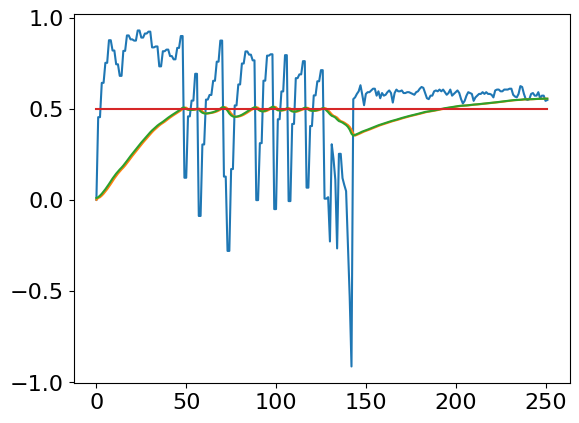

Running simulations:  94%|█████████▍| 94/100 [36:13<02:17, 22.90s/it]

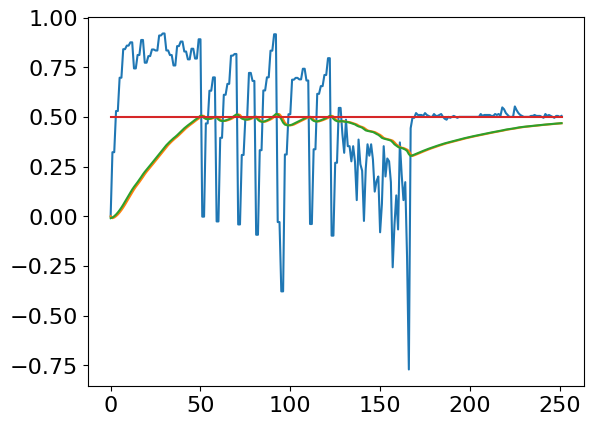

Running simulations:  95%|█████████▌| 95/100 [36:36<01:54, 22.92s/it]

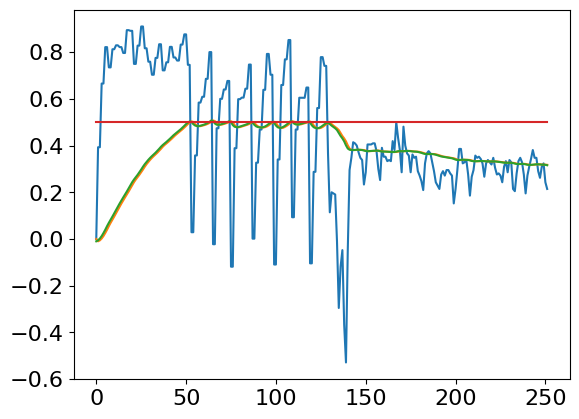

Running simulations:  96%|█████████▌| 96/100 [36:59<01:31, 22.89s/it]

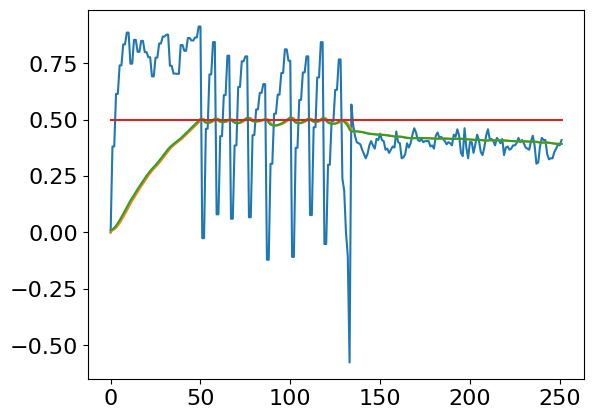

Running simulations:  97%|█████████▋| 97/100 [37:21<01:08, 22.75s/it]

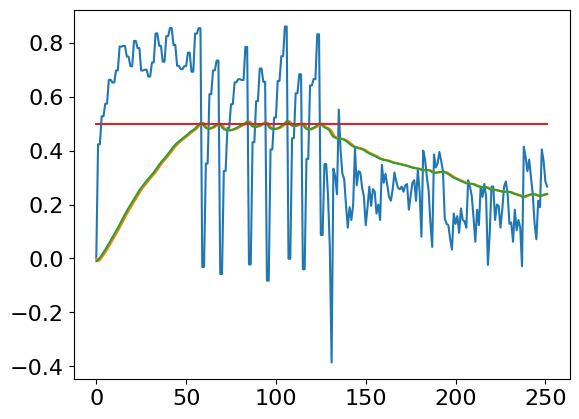

Running simulations:  98%|█████████▊| 98/100 [37:45<00:45, 22.89s/it]

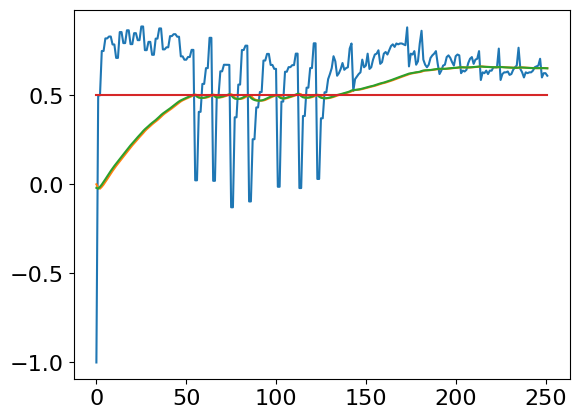

Running simulations:  99%|█████████▉| 99/100 [38:08<00:22, 22.98s/it]

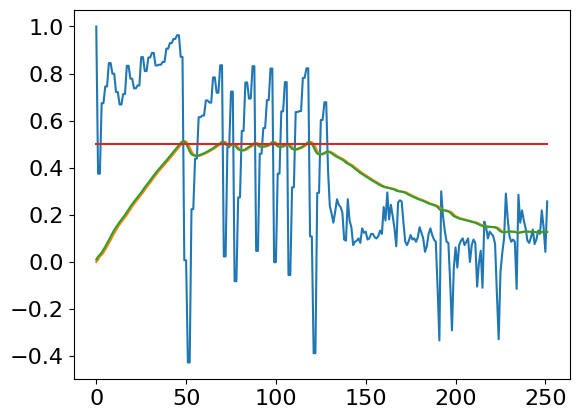

Running simulations: 100%|██████████| 100/100 [38:30<00:00, 23.11s/it]
/tmp/ipykernel_30/2016822650.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = pd.DataFrame(all_obs).applymap(list)


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.rcParams.update({'font.size': 16}) 

def run_simulations(env, model, tokenizer, n_simulations=10, n_steps=251, scaler=2, repeat=3, mean=True):
    all_obs = []
    for _ in tqdm(range(n_simulations), desc="Running simulations"):
        observation, _ = env.reset()
        obs, action, sim_obs = [observation], 0, []
        for i in range(n_steps):
            if i < model.config.hidden_size and i % scaler == 0:
                action = (action + 0.8*env.sign*np.sign(np.diff(observation[-2:])) + 0.2*env.action_space.sample())/2
                #action = (env.sign*np.sign(np.diff(observation[-2:])))/2 + 1./2
            elif i >= model.config.hidden_size :
                wanted_obs = obs + repeat*[np.array([0,0,0,observation[-1]])] + repeat*[np.array([observation[-1],0,0,observation[-1]])] # setpoint + target
                #print(wanted_obs)
                tokenstamp = tokenizer(audio={'array': np.stack(wanted_obs).T[[0,3]]})
                #print(np.stack(wanted_obs).T[[0,3]])
                in_model = tokenstamp['input_ids'][None, :-1]
                #print(tokenizer.convert_ids_to_tokens(tokenstamp['labels'][-10:]))
                #print(in_model[:,-2*repeat:])
                targets = list(range(in_model.shape[1]-4*repeat, in_model.shape[1]-2*repeat, 2)); 
                #print(targets)
                #setpoint = list(range(in_model.shape[1]-2*repeat+1, in_model.shape[1], 2)); 
                label_actions = tokenstamp['input_ids'][None, targets, -1]
                #label_setpoint = tokenstamp['input_ids'][None, setpoint, -1]
                #print(i, label_actions,tokenizer.convert_ids_to_tokens(label_actions[0]))
                #print(i, label_setpoint,tokenizer.convert_ids_to_tokens(label_setpoint[0]))
                out_model = model.generate(in_model, idn_generator=targets, temperature=0.1).detach().int()
                #action_tokens = list(out_model[0,setpoint,-1]) # + list(out_model[0,targets,-1])
                action_tokens = list(out_model[0,targets,-1]) #list(out_model[0,setpoint,-1]) # + list(out_model[0,targets,-1])
                #print(out_model[:,-2*repeat:], action_tokens)#,tokenizer.convert_ids_to_tokens(action_tokens[0]))
                #print(f"{i} finish")
                action_list = [a if isinstance(a, float) else 0.5 for a in tokenizer.convert_ids_to_tokens(action_tokens)]
                action = [np.mean(action_list)] if mean else [action_list[-1]]
            observation, _, _, _, _ = env.step(action)
            sim_obs.append(observation[[0,2]])
            obs.append(observation)
        plt.plot(obs);plt.show()
        all_obs.append(sim_obs)
        
    df = pd.DataFrame(all_obs).applymap(list)
    df.to_csv('simulation_results.csv', index=False)
    return df, model.config.hidden_size


# Usage example:
n_simulations = 100
N = 251 #model.config.hidden_size+5
df, transition_point = run_simulations(env, model, tokenizer, n_steps=N, n_simulations=n_simulations)